In [5]:
from environment import NormalMoveEnv
from experiment import Trajectory
from nn import BetaModel, Model, GeneralModel, TransitionModel
from rl import Agent

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline

# Env

In [6]:
walls=[
    ([9.9,-1.],[10., 1.]), # horozontal
    # ([-8.,-1.],[10., 1.]), # horozontal
    # ([3.,3.],[5., 10.]) # Vertical
]
goal=[([5.,8.],[10.,10.])]

env = NormalMoveEnv(goals=goal, walls=walls)

s = env.reset()
print(s)
print(env.step(0))

# ax = env.plot()

[ 0.01073512 -6.79214324]
(array([ 0.99787664, -6.8009315 ], dtype=float32), True, False)


# Trajectory

<AxesSubplot: >

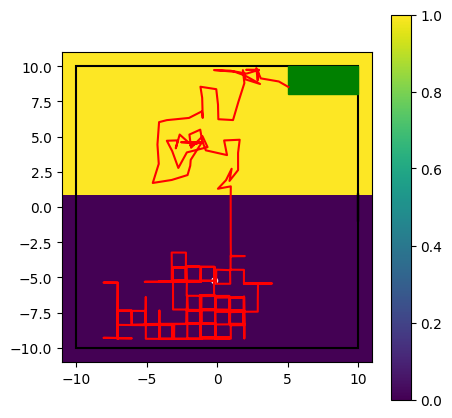

In [7]:
t = Trajectory(env, size=1_000)
ax = t.plot(env.plot())
ax

# NN Model

-6052.9373138910205 nan


array([<AxesSubplot: title={'center': 'model_0'}>,
       <AxesSubplot: title={'center': 'model_1'}>], dtype=object)

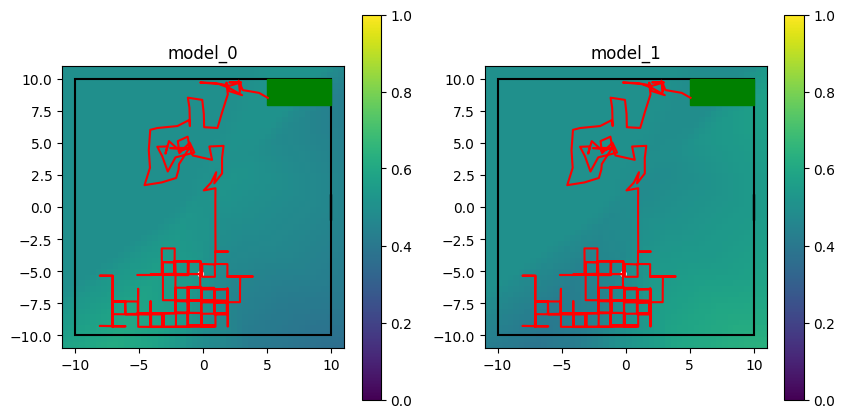

In [15]:
m = TransitionModel(env, k=2, lr=1e-5, momentum=.9)

ll = m.batch_train(t.run, 1000)
print(ll[0], ll[-1])

_, ax = plt.subplots(ncols=m.k, figsize=(m.k*5, 5))
for k in range(m.k):
    ax[k] = env.plot(ax[k], background=False)
    ax[k] = t.plot(ax[k])
m.plot_probs(ax)

nan nan


array([<AxesSubplot: title={'center': 'model_0'}>,
       <AxesSubplot: title={'center': 'model_1'}>], dtype=object)

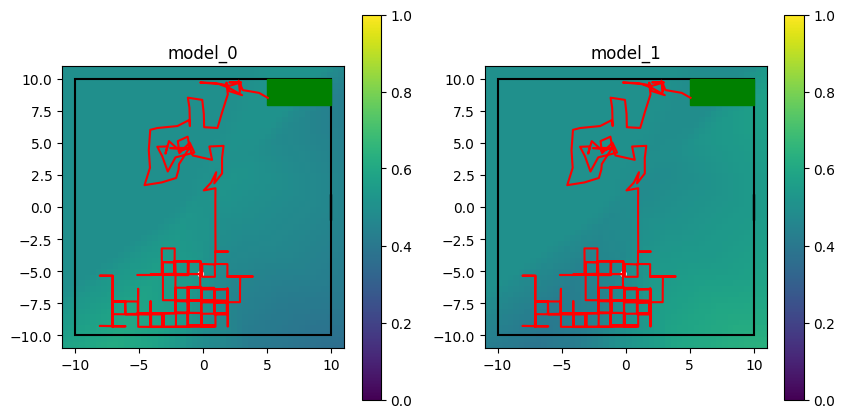

In [18]:
ll = m.batch_train(t.run, 1000)
print(ll[0], ll[-1])

_, ax = plt.subplots(ncols=m.k, figsize=(m.k*5, 5))
for k in range(m.k):
    ax[k] = env.plot(ax[k], background=False)
    ax[k] = t.plot(ax[k])
m.plot_probs(ax)